## Comparison between LDA and FastText to identify similar documents from training set 

In [1]:
from Model import Model
from Validation import Validation
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
from gensim.models.fasttext import FastText as FT_gensim
from gensim.test.utils import datapath

## Load data

In [2]:
data_df=Model().df_pkl
train,test,train_df,test_df=Model().get_train_and_test_for_FT(data_df.copy())

In [3]:
train_dict={tup[0]:tup[1] for tup in list(zip(train_df['Name'],train_df['EC']))}
test_dict={tup[0]:tup[1] for tup in list(zip(test_df['Name'],test_df['EC']))}

In [6]:
topics=list(train_dict.values())

In [26]:
df=pd.DataFrame(columns=['test_key','train_key','similar','different'])
for i,j in test_dict.items():
    for m,n in train_dict.items():
        sims=len(list(set(j).intersection(n)))
        diff=(len(n)-sims)/len(n)
        #print ([[i,m,sims,diff]])
        df=df.append(pd.DataFrame(data=[[i,m,sims,diff]],columns=['test_key','train_key','similar','different']))


In [27]:
df.loc[df['test_key']=='beta-Alanine metabolism'].sort_values(by='similar').tail(50)

,test_key,train_key,similar,different
0,beta-Alanine metabolism,Lipoarabinomannan (LAM) biosynthesis,0,1.000000
0,beta-Alanine metabolism,Carbon fixation in photosynthetic organisms,0,1.000000
0,beta-Alanine metabolism,Biosynthesis of ansamycins,0,1.000000
0,beta-Alanine metabolism,Staurosporine biosynthesis,0,1.000000
0,beta-Alanine metabolism,Lipoic acid metabolism,0,1.000000
0,beta-Alanine metabolism,Monobactam biosynthesis,0,1.000000
0,beta-Alanine metabolism,Streptomycin biosynthesis,0,1.000000
0,beta-Alanine metabolism,Biotin metabolism,0,1.000000
0,beta-Alanine metabolism,Fatty acid biosynthesis,0,1.000000
0,beta-Alanine metabolism,Vitamin B6 metabolism,0,1.000000


## Run LDA analysis

In [4]:
dictionary,corpus=Model().get_dict_corpus(train)
model=Model().MyLDA(corpus,dictionary,num_topics=150,random_state=250,passes=100)

### Similarity value close to 0 suggests more similar documents and 1 is least similar

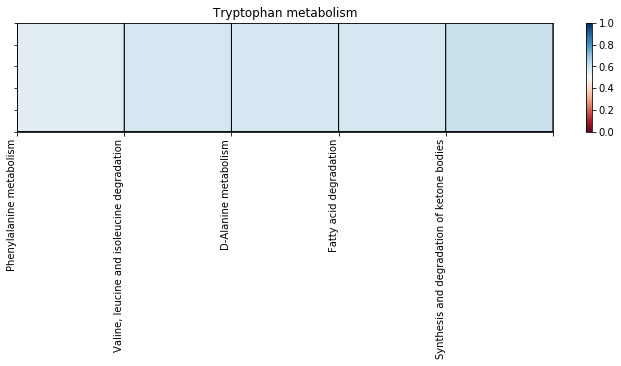

<Figure size 432x288 with 0 Axes>

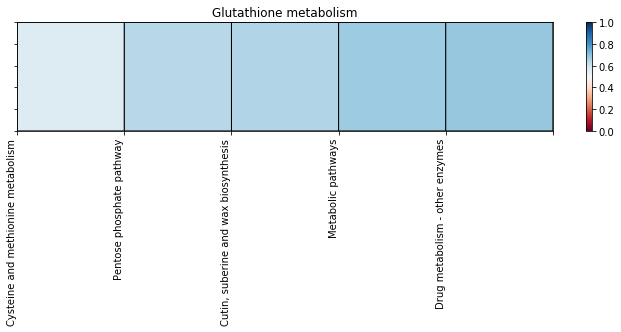

<Figure size 432x288 with 0 Axes>

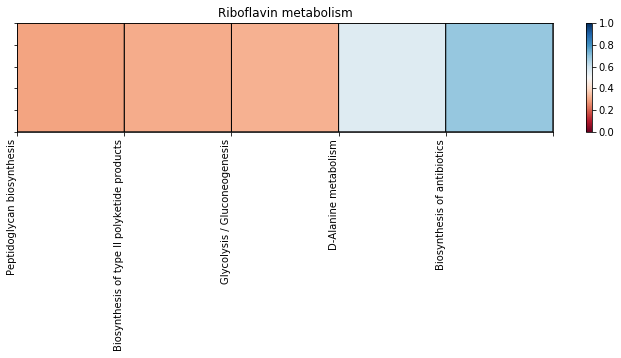

<Figure size 432x288 with 0 Axes>

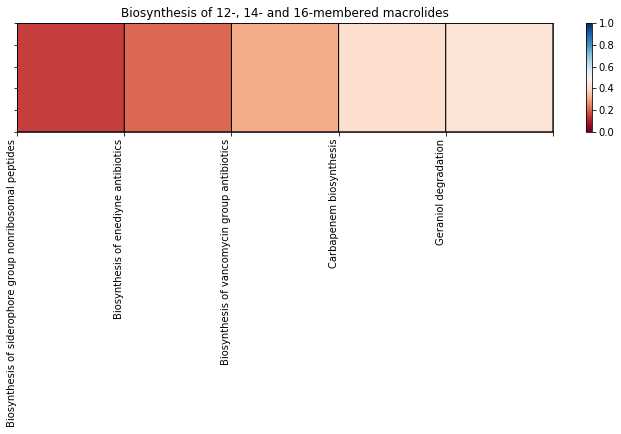

<Figure size 432x288 with 0 Axes>

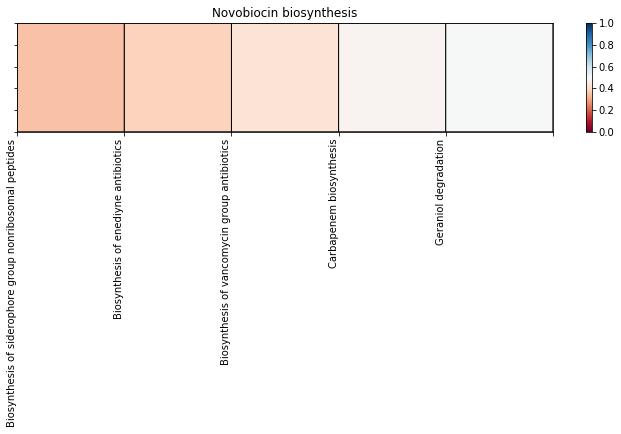

<Figure size 432x288 with 0 Axes>

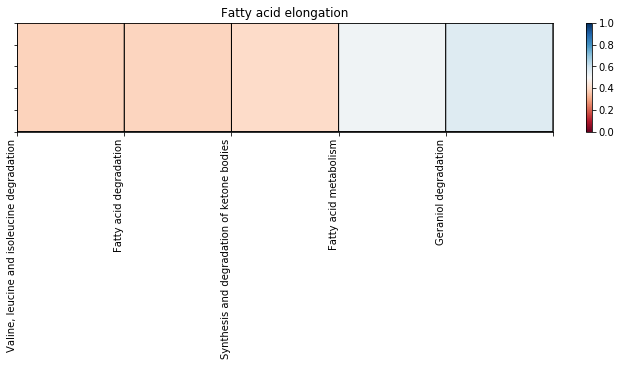

<Figure size 432x288 with 0 Axes>

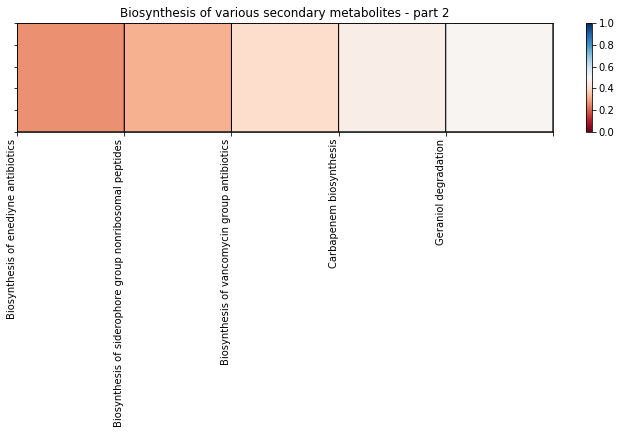

<Figure size 432x288 with 0 Axes>

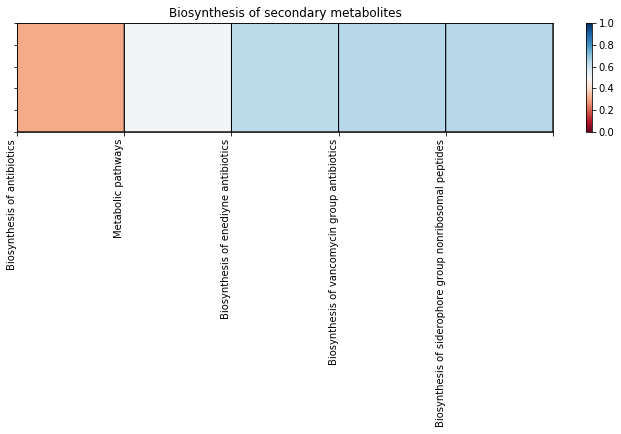

<Figure size 432x288 with 0 Axes>

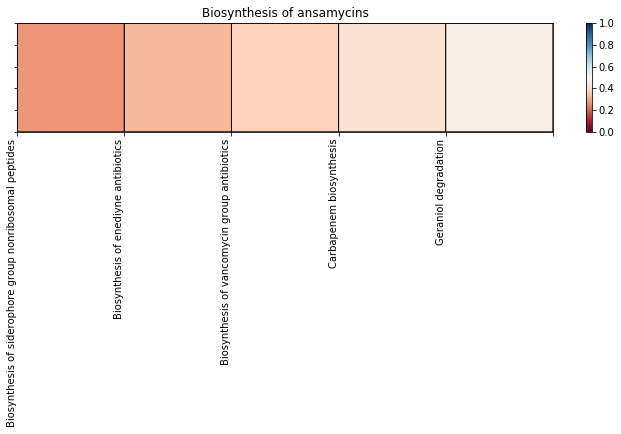

<Figure size 432x288 with 0 Axes>

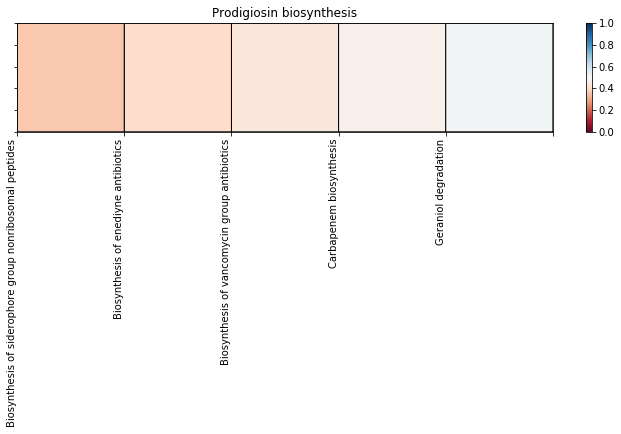

<Figure size 432x288 with 0 Axes>

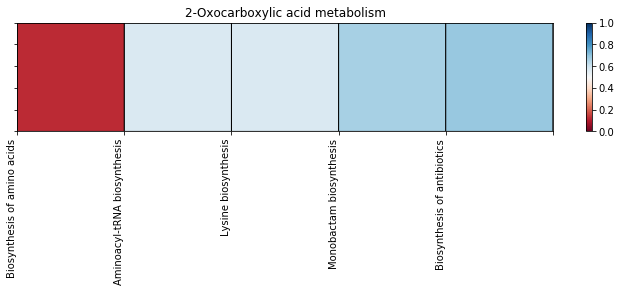

<Figure size 432x288 with 0 Axes>

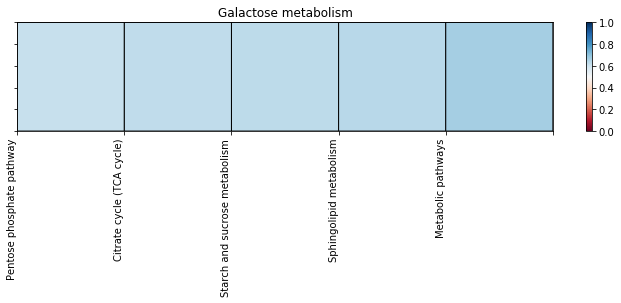

<Figure size 432x288 with 0 Axes>

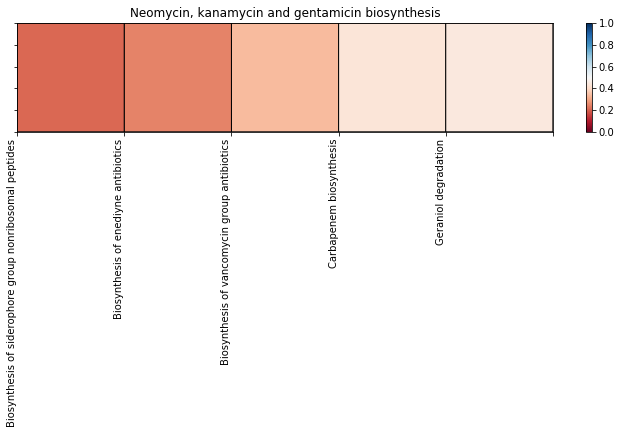

<Figure size 432x288 with 0 Axes>

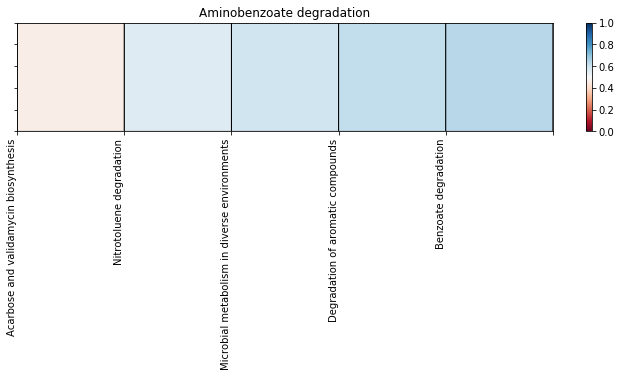

<Figure size 432x288 with 0 Axes>

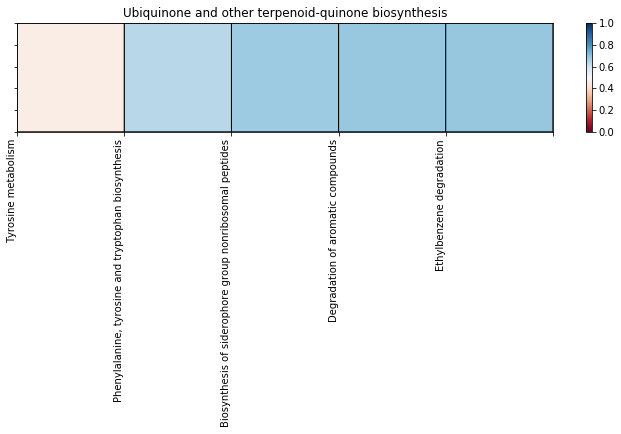

<Figure size 432x288 with 0 Axes>

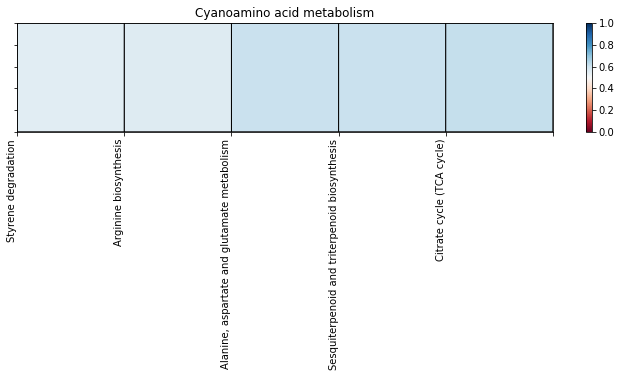

<Figure size 432x288 with 0 Axes>

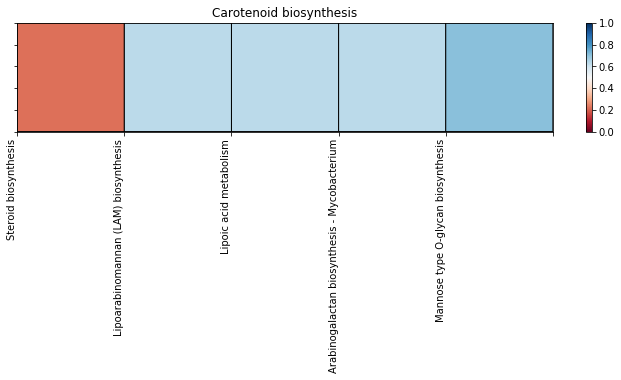

<Figure size 432x288 with 0 Axes>

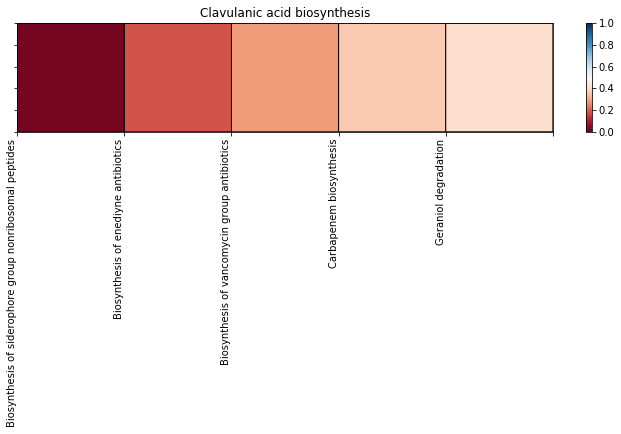

<Figure size 432x288 with 0 Axes>

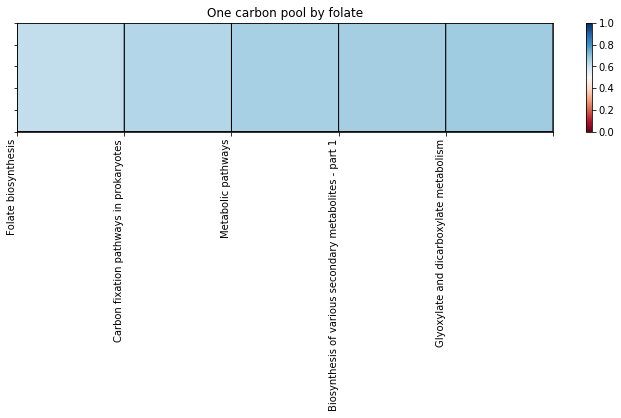

<Figure size 432x288 with 0 Axes>

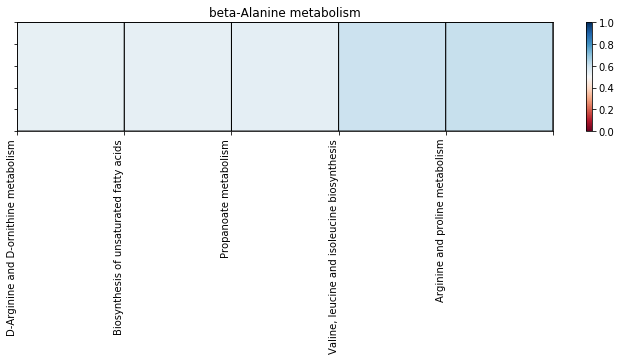

<Figure size 432x288 with 0 Axes>

In [5]:
df_result=Validation().compare_test_train_docs(test_df,train_df,model,dictionary)
Validation().print_heat_map_for_one(df_result,test_df)

## Run FastText similarity based classification to identify similar documents from training set. 
### Parameters for model are based on (a) length of words, (b) size of document and hence window

In [6]:
model_gensim = FT_gensim(size=100)

In [7]:
model_gensim.build_vocab(sentences=train,min_count=1)

In [8]:
print (model_gensim)

FastText(vocab=3282, size=100, alpha=0.025)


In [9]:
model_gensim.train(train, total_examples=len(train), epochs=100,min_n=5,window=200)

In [10]:
model_gensim.most_similar("ec:1.2.3.6",topn=100)

/Users/saijananiganesan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ec:1.2.3.4', 0.9987491369247437),
 ('ec:1.2.3.7', 0.9977383017539978),
 ('ec:1.2.3.8', 0.9971264600753784),
 ('ec:1.2.3.5', 0.9946666955947876),
 ('ec:1.2.3.3', 0.9941316843032837),
 ('ec:1.2.3.13', 0.967208981513977),
 ('ec:1.2.3.1', 0.9643956422805786),
 ('ec:1.2.3.14', 0.9599590301513672),
 ('ec:1.2.99.6', 0.9591474533081055),
 ('ec:1.2.99.8', 0.9531692266464233),
 ('ec:1.2.98.1', 0.9470961093902588),
 ('ec:1.2.5.2', 0.944196343421936),
 ('ec:1.2.4.4', 0.9330320358276367),
 ('ec:1.2.2.1', 0.9126288294792175),
 ('ec:1.2.5.1', 0.9124571084976196),
 ('ec:1.21.98.3', 0.9123827219009399),
 ('ec:1.2.4.2', 0.9091827869415283),
 ('ec:1.21.98.2', 0.9053934812545776),
 ('ec:1.2.7.5', 0.9016293287277222),
 ('ec:1.2.7.4', 0.9010796546936035),
 ('ec:1.2.7.6', 0.8983480930328369),
 ('ec:1.2.7.3', 0.8933308124542236),
 ('ec:1.8.2.1', 0.8925893306732178),
 ('ec:1.21.99.5', 0.8906822204589844),
 ('ec:1.2.1.89', 0.8885354995727539),
 ('ec:1.21.4.5', 0.8835117816925049),
 ('ec:1.2.1.7', 0.882802963

In [11]:
model_gensim.most_similar("ec:1.14.14.38",topn=100)


/Users/saijananiganesan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ec:1.14.14.36', 0.9997864961624146),
 ('ec:1.14.14.34', 0.9997813105583191),
 ('ec:1.14.14.35', 0.9997235536575317),
 ('ec:1.14.14.37', 0.9996842741966248),
 ('ec:1.14.14.32', 0.99964439868927),
 ('ec:1.14.14.86', 0.9995046854019165),
 ('ec:1.14.14.39', 0.9995028376579285),
 ('ec:1.14.14.82', 0.9994706511497498),
 ('ec:1.14.14.85', 0.999421238899231),
 ('ec:1.14.14.80', 0.999408483505249),
 ('ec:1.14.14.8', 0.9993618130683899),
 ('ec:1.14.14.81', 0.9992830753326416),
 ('ec:1.14.14.87', 0.9992320537567139),
 ('ec:1.14.14.51', 0.9991644024848938),
 ('ec:1.14.14.83', 0.9991264939308167),
 ('ec:1.14.14.98', 0.999100923538208),
 ('ec:1.14.14.46', 0.9990708827972412),
 ('ec:1.14.14.45', 0.9990569353103638),
 ('ec:1.14.14.95', 0.999036967754364),
 ('ec:1.14.14.94', 0.9989880323410034),
 ('ec:1.14.14.47', 0.9989349246025085),
 ('ec:1.14.14.53', 0.9989278316497803),
 ('ec:1.14.14.92', 0.9989160299301147),
 ('ec:1.14.14.54', 0.9988713264465332),
 ('ec:1.14.14.97', 0.998868465423584),
 ('ec:1.

In [12]:
lst=[]
for i,j in enumerate(test):
    for k,l in enumerate(train):
        sim=model_gensim.n_similarity(test[i], train[k])
        if sim>0:
            lst.append([list(test_dict.keys())[i],list(train_dict.keys())[k],sim,len(test[i]),len(train[k])])
df_sim=pd.DataFrame(lst,columns=['Pathway_test','Pathway_train','Similarity','test length','train length'])


/Users/saijananiganesan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  after removing the cwd from sys.path.


In [13]:
#del df_sim

df_sim.sort_values(by=['Similarity'])

,Pathway_test,Pathway_train,Similarity,test length,train length
499,Biosynthesis of various secondary metabolites ...,Nicotinate and nicotinamide metabolism,0.000110,28,62
177,Glutathione metabolism,Biosynthesis of unsaturated fatty acids,0.000392,41,15
753,Prodigiosin biosynthesis,Biosynthesis of antibiotics,0.000767,5,552
25,Tryptophan metabolism,Biosynthesis of siderophore group nonribosomal...,0.001579,64,5
100,Glutathione metabolism,Selenocompound metabolism,0.002219,41,18
...,...,...,...,...,...
452,Fatty acid elongation,Fatty acid metabolism,0.890254,15,44
1118,Aminobenzoate degradation,Styrene degradation,0.897762,54,21
969,Galactose metabolism,Fructose and mannose metabolism,0.904154,52,77
1110,Aminobenzoate degradation,Degradation of aromatic compounds,0.905409,54,117


### Similarity value close to 1 suggests more similar documents and 0 is least similar

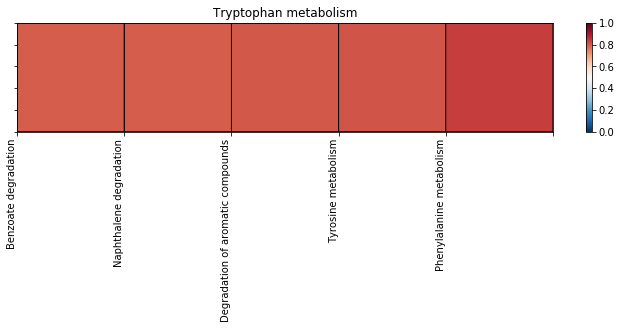

<Figure size 432x288 with 0 Axes>

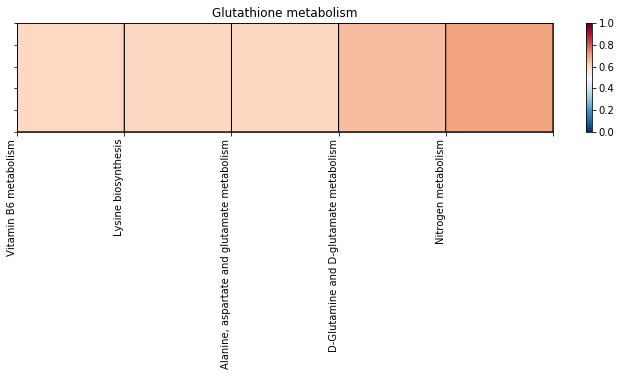

<Figure size 432x288 with 0 Axes>

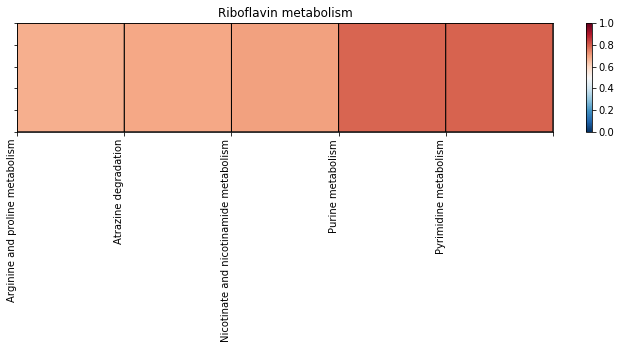

<Figure size 432x288 with 0 Axes>

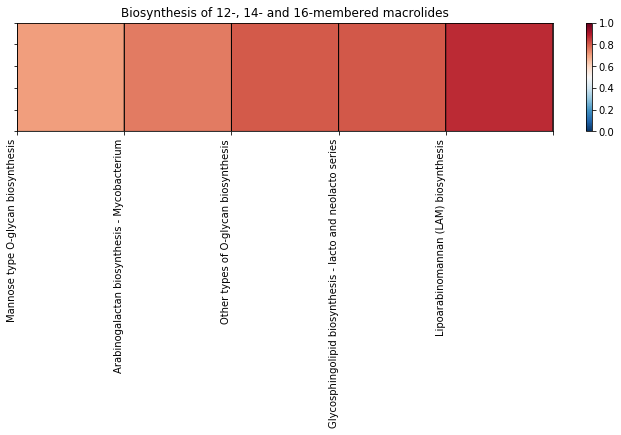

<Figure size 432x288 with 0 Axes>

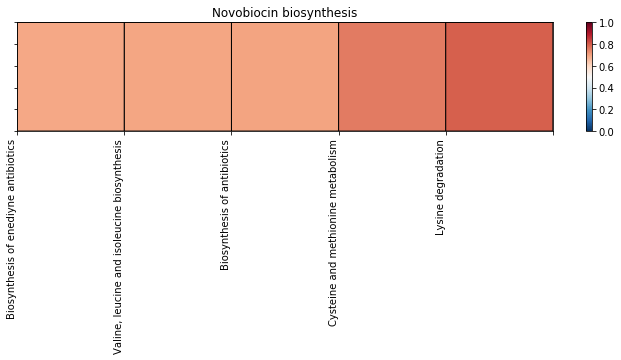

<Figure size 432x288 with 0 Axes>

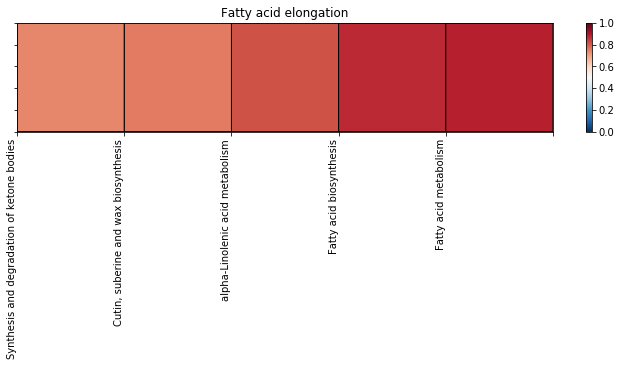

<Figure size 432x288 with 0 Axes>

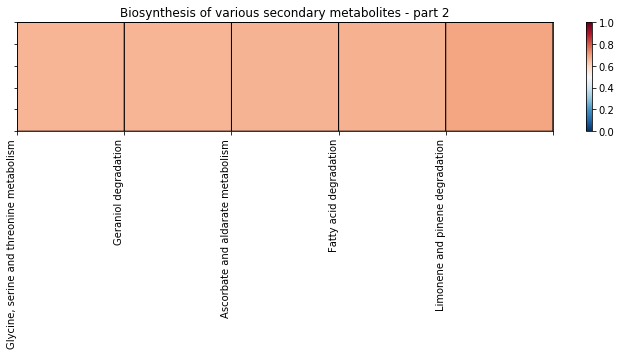

<Figure size 432x288 with 0 Axes>

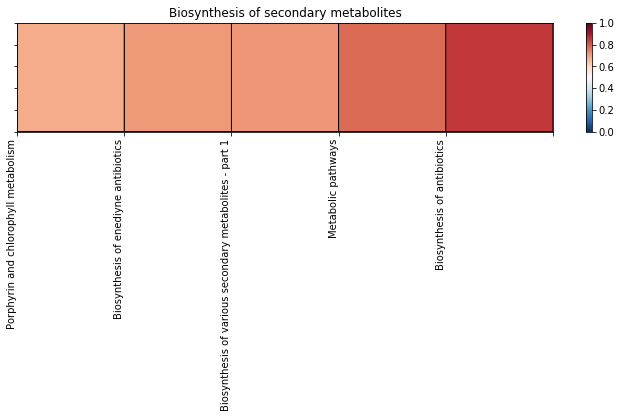

<Figure size 432x288 with 0 Axes>

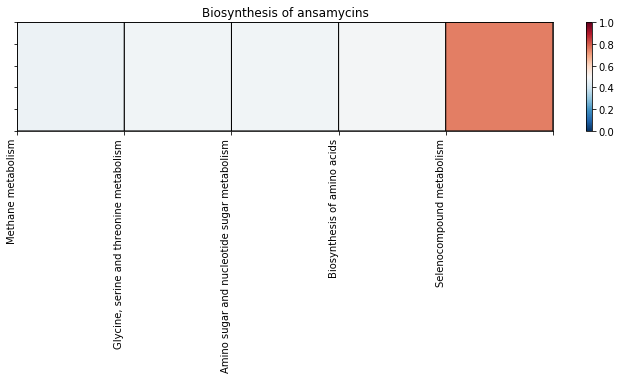

<Figure size 432x288 with 0 Axes>

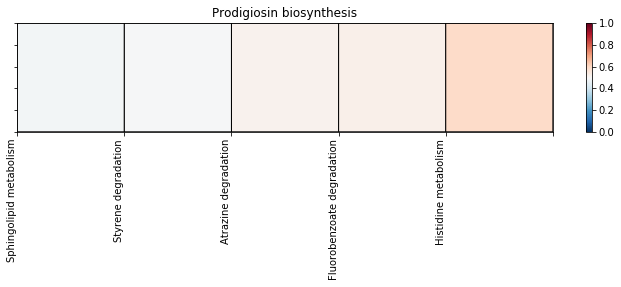

<Figure size 432x288 with 0 Axes>

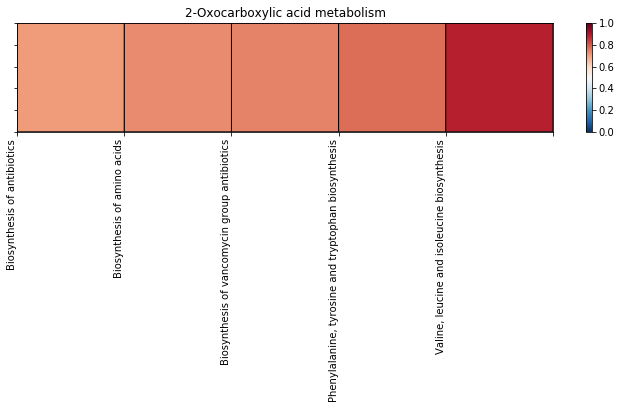

<Figure size 432x288 with 0 Axes>

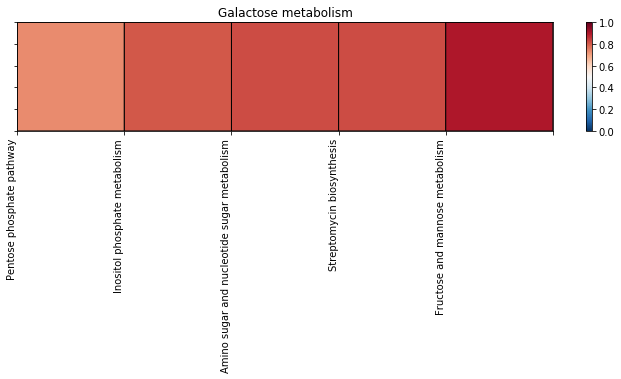

<Figure size 432x288 with 0 Axes>

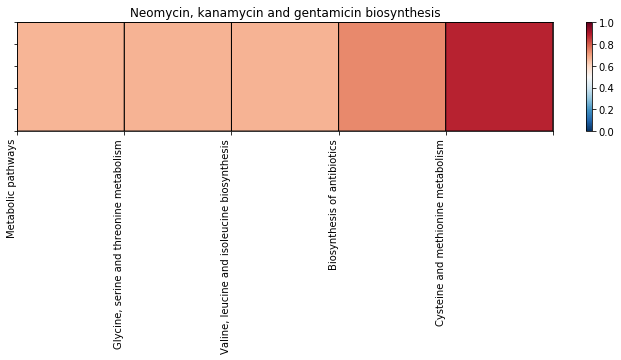

<Figure size 432x288 with 0 Axes>

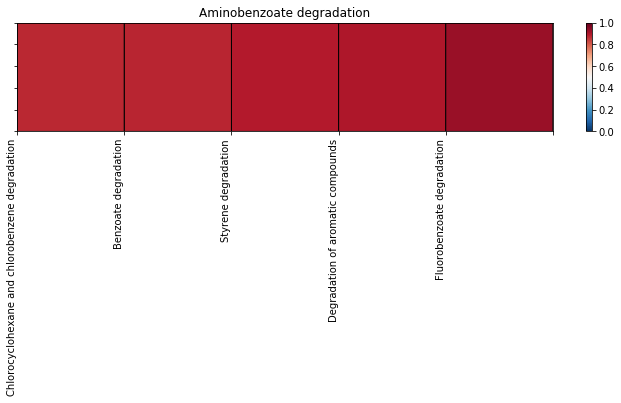

<Figure size 432x288 with 0 Axes>

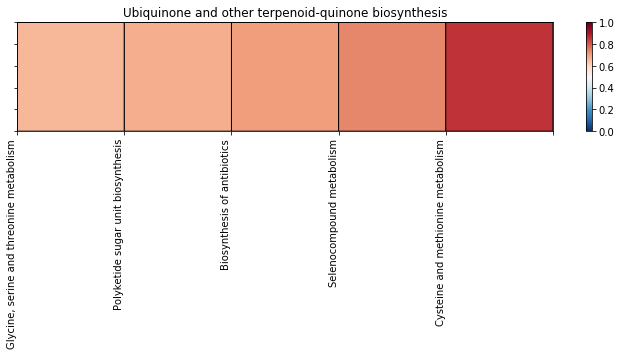

<Figure size 432x288 with 0 Axes>

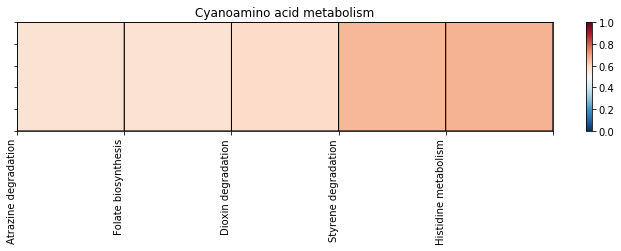

<Figure size 432x288 with 0 Axes>

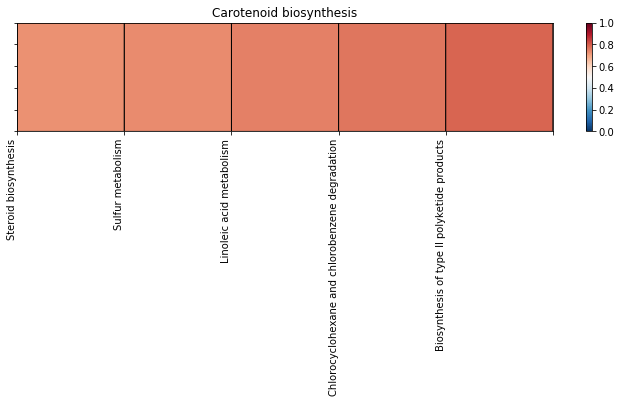

<Figure size 432x288 with 0 Axes>

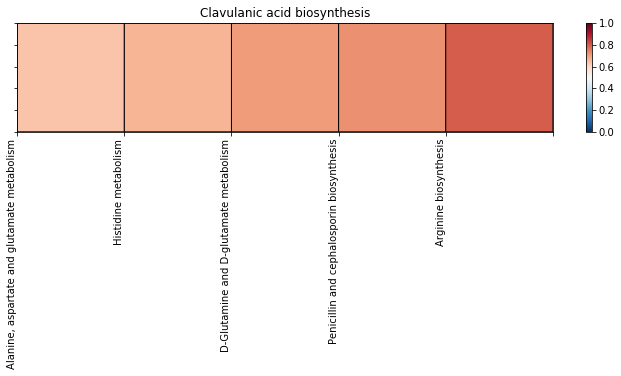

<Figure size 432x288 with 0 Axes>

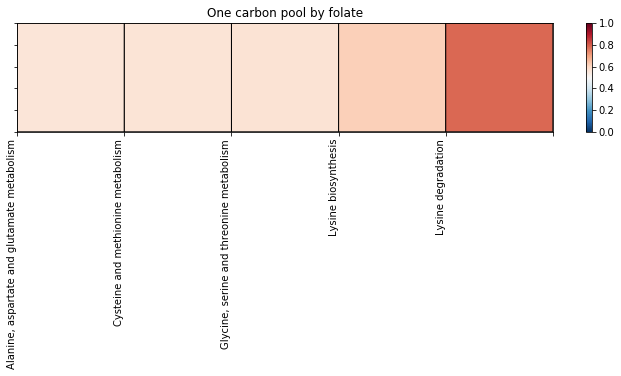

<Figure size 432x288 with 0 Axes>

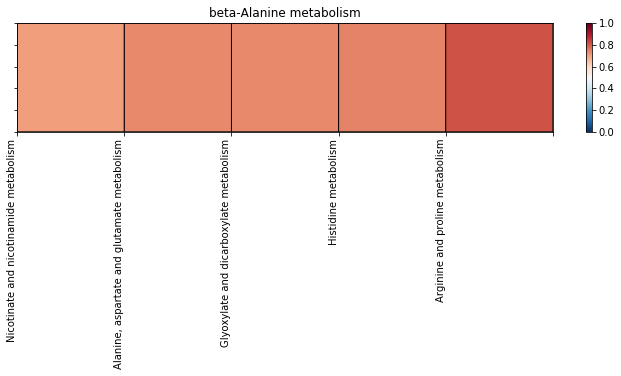

<Figure size 432x288 with 0 Axes>

In [14]:
Validation().print_heat_map_for_one_FT(df_sim,test_df)

#### Conclusions: 
##### 1. FastText perfoms as well as LDA except in predicting secondary metabolites
##### 2. FastText can be used when test set contains words not seen by the model, unlike LDA
##### 3. In addition to similarity, LDA provides co-occuring clusters that can be used for pathway prediction



In [20]:
a='still';b='fff'

In [22]:
if a and b and c:
    
    print ("b")

NameError: name 'c' is not defined